In [1]:
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

In [2]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
pima = pd.read_csv('diabetes.csv')

In [3]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# split dataset in features and outcome
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = pima[features]
y = pima.Outcome  # target

In [5]:
# Split dataset into Training and Test (70% Training    30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [6]:
# Creating a Decision Tree
dt = DecisionTreeClassifier()

# Train the classifier
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
# predict values
y_pred = dt.predict(X_test)

In [8]:
# Model Accuracy
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)} ', )

Accuracy: 0.6406926406926406 


In [9]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=features,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
# graph

In [10]:
# Testing with max depth = 4
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [11]:
# Model Accuracy
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)} ', )

Accuracy: 0.7662337662337663 


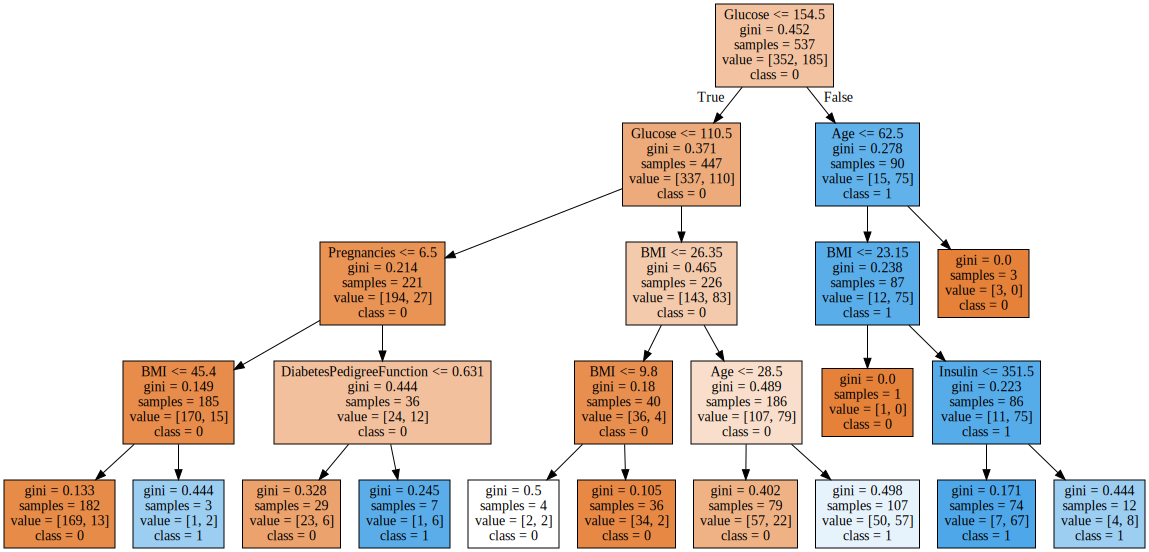

In [12]:
dot_data2 = tree.export_graphviz(dt, out_file=None, 
                                feature_names=features,
                                class_names=['0', '1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data2, format="png")
graph